In [1]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)


/home/ma/.bin/anaconda3/envs/tensor/lib/python3.7/site-packages/tensorflow/python/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/home/ma/.bin/anaconda3/envs/tensor/lib/python3.7/site-packages/tensorflow/python/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [2]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):

    results = np.zeros((len(sequences), dimension))

    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results


X_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')



In [3]:
X_train.shape

(25000, 10000)

In [4]:
train_data.shape

(25000,)

In [5]:
from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics


model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
            loss=losses.binary_crossentropy,metrics=[metrics.binary_accuracy])


In [6]:
x_val = X_train[:10000]
partial_X_train = X_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

model.compile(optimizer='rmsprop', loss='binary_crossentropy',
                metrics=['acc'])


history = model.fit(partial_X_train,
                    partial_y_train, epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))


Epoch 1/20
30/30 [==============================] - 1s 32ms/step - loss: 0.5608 - acc: 0.7587 - val_loss: 0.4485 - val_acc: 0.8085
Epoch 2/20
30/30 [==============================] - 1s 31ms/step - loss: 0.3368 - acc: 0.8965 - val_loss: 0.3357 - val_acc: 0.8653
Epoch 3/20
30/30 [==============================] - 1s 30ms/step - loss: 0.2399 - acc: 0.9225 - val_loss: 0.3000 - val_acc: 0.8799
Epoch 4/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1842 - acc: 0.9417 - val_loss: 0.2751 - val_acc: 0.8932
Epoch 5/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1507 - acc: 0.9517 - val_loss: 0.2837 - val_acc: 0.8873
Epoch 6/20
30/30 [==============================] - 1s 28ms/step - loss: 0.1246 - acc: 0.9621 - val_loss: 0.3113 - val_acc: 0.8817
Epoch 7/20
30/30 [==============================] - 1s 28ms/step - loss: 0.1017 - acc: 0.9693 - val_loss: 0.3193 - val_acc: 0.8826
Epoch 8/20
30/30 [==============================] - 1s 26ms/step - loss: 0.0840 - a

In [7]:
history_dict = history.history

In [8]:
history_dict

{'loss': [0.5608147978782654,
  0.3367699682712555,
  0.23994001746177673,
  0.18417462706565857,
  0.15074169635772705,
  0.12455439567565918,
  0.10171597450971603,
  0.08399799466133118,
  0.06796383112668991,
  0.05847129225730896,
  0.044110994786024094,
  0.03715435042977333,
  0.02912112884223461,
  0.024676484987139702,
  0.018479134887456894,
  0.014837942086160183,
  0.010199391283094883,
  0.009297989308834076,
  0.005953595042228699,
  0.005661539733409882],
 'acc': [0.7586666941642761,
  0.8965333104133606,
  0.9224666953086853,
  0.9417333602905273,
  0.9517333507537842,
  0.9621333479881287,
  0.9693333506584167,
  0.9749333262443542,
  0.9823333621025085,
  0.984666645526886,
  0.9904666543006897,
  0.9918666481971741,
  0.9945999979972839,
  0.9955999851226807,
  0.9969333410263062,
  0.9981333613395691,
  0.9992666840553284,
  0.9990000128746033,
  0.9994666576385498,
  0.9990000128746033],
 'val_loss': [0.4485130310058594,
  0.33569449186325073,
  0.2999846935272217,

In [9]:
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [10]:
import matplotlib.pyplot as plt


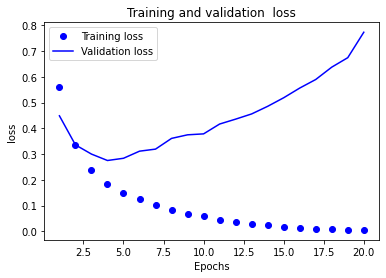

In [11]:
loss_val = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_val) + 1)

plt.plot(epochs, loss_val, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.xlabel('Epochs')
plt.title("Training and validation  loss")
plt.ylabel('loss')
plt.legend()


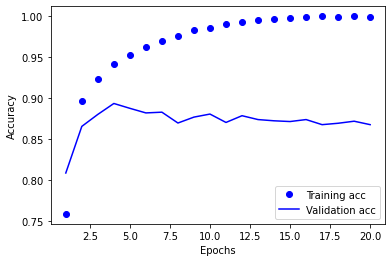

In [12]:
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
